In [45]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import meteva.method as mem
import meteva.product as mpd
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


本模块的函数族旨在提供基于带有时空信息的观测预报数据进行分类检验的方法，函数会返回每个分组样本对应的混淆矩阵，频率统计等表格结果，表格会以矩阵形式返回，同时会输出到excel文件当中。在浏览本模块函数说明之前可先参阅函数设计的[关键技术思想](https://www.showdoc.cc/meteva?page_id=4072178802924517)以及本模块测试用的[数据简介](https://www.showdoc.cc/nmc?page_id=3831227192066999)

In [2]:
###################以下开始为数据收集部分的程序

#设置关注的起始时段
time_start = datetime.datetime(2019,1,1,8,0)   
time_end = datetime.datetime(2020,1,1,8,0)
#读取站点列表，并将站点内容为缺省值，当其作为读取站点数据的参数时，如果站点文件中某个站号不存在时,返回结果中该站点保持为缺省值
station = meb.read_stadata_from_micaps3(r"H:\test_data\input\mpd\ob\temp_2m\BT19010102.000")
station.iloc[:,-1] = meb.IV 


##读取收集观测数据
dir_ob = r"H:\test_data\input\mpd\ob\temp_2m\BTYYMMDDHH.000"
sta_list = []
time0 = time_start
while time0 < time_end:
    path = meb.get_path(dir_ob,time0)
    sta = meb.read_stadata_from_micaps3(path,station = station,time = time0,dtime = 0,level = 0,data_name = "ob")
    sta_list.append(sta)
    time0 += datetime.timedelta(hours = 3)
ob_sta_all = pd.concat(sta_list,axis = 0)  #数据拼接
ob_sta_all = meb.sele_by_para(ob_sta_all,value=[-100,100]) #简单的质量控制

#读取收集ec预报数据
dir_ec = r"H:\test_data\input\mpd\ec\temp_2m\YYMMDD\BTYYMMDDHH.TTT"
sta_list =[]
time0 = time_start
while time0 <= time_end:
    for dh in range(0,73,3):
        path = meb.get_path(dir_ec,time0,dh)
        grd = meb.read_griddata_from_micaps4(path)
        if grd is not None:
            sta = meb.interp_gs_linear(grd,station)
            meb.set_stadata_coords(sta,time = time0,dtime = dh,level = 0)
            meb.set_stadata_names(sta,["ecmwf"])
            sta_list.append(sta)
    time0 += datetime.timedelta(hours = 132)  #此处跳着读是为了减少测试用时
ec_sta_all = pd.concat(sta_list,axis = 0)  #数据拼接
            
#读取收集grapes预报数据
dir_grapes = r"H:\test_data\input\mpd\grapes\temp_2m\YYMMDD\BTYYMMDDHH.TTT"
sta_list =[]
time0 = time_start
while time0 <= time_end:
    for dh in range(0,73,3):
        path = meb.get_path(dir_grapes,time0,dh)
        grd = meb.read_griddata_from_micaps4(path)
        if grd is not None:
            sta = meb.interp_gs_linear(grd,station)
            meb.set_stadata_coords(sta,time = time0,dtime = dh,level = 0)
            meb.set_stadata_names(sta,["grapes"])
            sta_list.append(sta)  
    time0 += datetime.timedelta(hours = 132)
grapes_sta_all = pd.concat(sta_list,axis = 0)  #数据拼接
    
#数据匹配合并
sta_all = meb.combine_on_obTime_id(ob_sta_all,[ec_sta_all,grapes_sta_all])
sta_all = meb.sele_by_para(sta_all,drop_IV = True)  #删除包含缺省值的样本
###################以上为数据收集部分的程序

H:\test_data\input\mpd\ob\temp_2m\BT19010602.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19010902.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19031614.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19042914.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19050805.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19050911.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19052917.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19052920.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19060614.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19060702.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19061214.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19061217.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19063002.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19063011.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19071111.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19071114.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19081611.000文件不存在
H:\test_data\input\mpd\ob\temp_2m\BT19090714.000文件不存在
H:\test_data\input\mpd\ob\te

H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.000 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.003 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.006 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.009 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.012 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.015 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.018 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.021 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.024 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.027 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.030 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.033 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT19042108.036 is not exist
H:\test_data\input\mpd\grapes\temp_2m\190421\BT1904

<font face="黑体" color=blue size=5>表格型检验产品生成</font>   
**table(sta_ob_and_fos,method,s = None,g = None,gll = None,save_dir = None,\*\*kwargs)**  
根据输入的站点数据和检验方法，生成表格型检验产品，并自动生成后缀名为.xlsx的文件批量输出到指定目录  


|参数|说明|  
|:--|:--|  
|<font face="黑体" color=blue size=5>**sta_ob_and_fos**</font>|实况和预报合并对齐后的数据，形式为站点数据格式如上述例子中的sta_all|   
|<font face="黑体" color=blue size=5>**method**</font>|method中的各类表格型的函数名称，例如在本页面中已经目前包括mem.contingency_table_yesorno,   mem.contingency_table_multicategory 和 mem.frequency_table等函数|   
|**s**| 用于选择数据样本的字典参数，具体的参数说明可参见meb.sele_by_dict中的[<font face="黑体" color=red size=5>s</font>](https://www.showdoc.cc/meteva?page_id=3975604785954540)参数  |   
|**g**|用于分组检验的参数，具体用法可参见meb.group中的[<font face="黑体" color=red size=5>g</font>](https://www.showdoc.cc/meteva?page_id=4071849185300418)参数|     
|**gll**| 用于分组检验的参数，具体用法可参见meb.group中的[<font face="黑体" color=red size=5>gll</font>](https://www.showdoc.cc/meteva?page_id=4071849185300418)参数|  
|**save_dir**|生成的表格文件的保存目录|
|**kwargs| 检验方法 meteva.method 中的可选参数，具体用法参见下面的示例|   
|<font face="黑体" color=blue size=5>return</font>|返回一个元组，其包含2个元素，第0个元素为一个矩阵，矩阵内容为每一组样本对应的统计结果合集，元组的第1个元素为实际的分组方式|  
  
**调用示例：**

In [35]:
# 本例子中，mpd.table中并没有具体指明其中包含grade_list参数，
#但是由于mem.contingency_table_yesorno这个函数中有grade_list，在使用mpd.table中就可以使用 grade_list这个参数
mpd.table(sta_all,mem.contingency_table_yesorno,grade_list = [0,1]) 

(array([[[[1119,  274, 1393],
          [ 127, 6821, 6948],
          [1246, 7095, 8341]],
 
         [[1265,  300, 1565],
          [ 127, 6649, 6776],
          [1392, 6949, 8341]]],
 
 
        [[[1170,  477, 1647],
          [  76, 6618, 6694],
          [1246, 7095, 8341]],
 
         [[1321,  538, 1859],
          [  71, 6411, 6482],
          [1392, 6949, 8341]]]], dtype=int64), None)

In [13]:
result,group = mpd.table(sta_all,mem.contingency_table_yesorno,s = {"month":[12],"id":[54398]})  #选取部分数据进行检验
print(result)  #  shape  = 2 （模式数） * 3 * 3(混淆矩阵shape)
print(group)   # 没有分组

(140,)
(2, 140)
[[[ 86  22 108]
  [  5  27  32]
  [ 91  49 140]]

 [[ 88  26 114]
  [  3  23  26]
  [ 91  49 140]]]
None


In [38]:
result,group = mpd.table(sta_all,mem.contingency_table_yesorno,g = "hour",
        save_dir = r"H:\test_data\output\mpd\base\table",grade_list = [0,1])  #按小时数（起报时间）分组检验
print(result.shape)  #  shape  = 2(分类数) * 2 （模式数） * 2（等级数）* 3 * 3
print(group)   #  按hour分组，结果包括[8] 和[20]


列联表已以excel表格形式保存至H:/test_data/output/mpd/base/table/contingency_table_yesorno__hour8_.xlsx

列联表已以excel表格形式保存至H:/test_data/output/mpd/base/table/contingency_table_yesorno__hour20_.xlsx
(2, 2, 2, 3, 3)
[8, 20]


其中contingency_table_yesorno_hour8_.xlsx的内容形式如下：
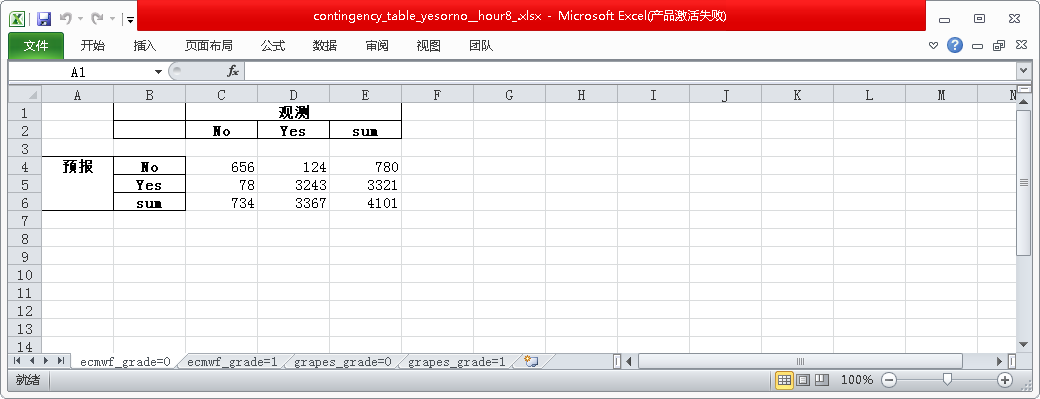
contingency_table_yesorno_hour20_.xlsx的形式和上图类似。上图中表格中sheet名称自动的根据sta_all中的数据列名和grade_list参数生成，不再需要额外输入模式名称参数。

In [39]:
result,group = mpd.table(sta_all,mem.contingency_table_multicategory,
                          save_dir = r"H:\test_data\output\mpd\base\table", grade_list = [0,1]) 
print(result.shape)
print(result)  #  shape  = 2 （模式数） * 4（2+等级数）* 4(2+等级数)
print(group)   #  未分组

列联表已以excel表格形式保存至H:/test_data/output/mpd/base/table/contingency_table_multicategory__.xlsx
(2, 4, 4)
[[[1119.   82.  192. 1393.]
  [  52.   12.  108.  172.]
  [  75.   52. 6649. 6776.]
  [1246.  146. 6949. 8341.]]

 [[1170.  100.  377. 1647.]
  [  32.   19.  161.  212.]
  [  44.   27. 6411. 6482.]
  [1246.  146. 6949. 8341.]]]
None


输出的excel截图如下：
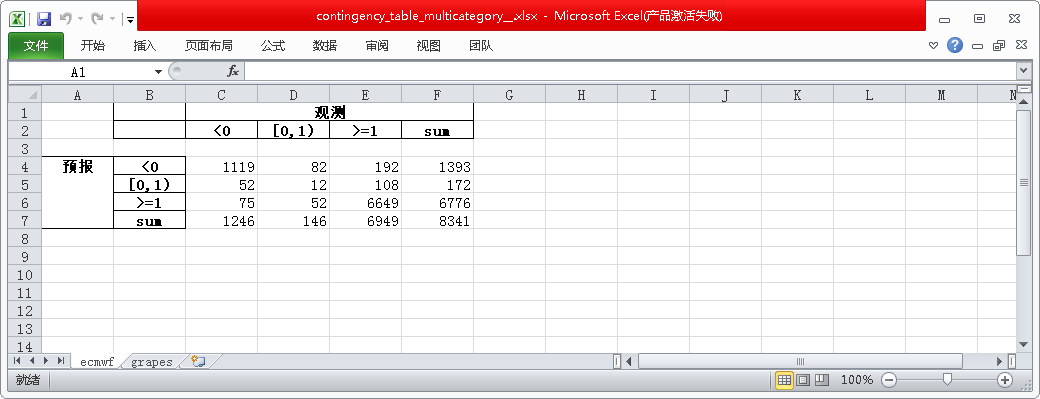

In [43]:
#通常在mpd.table会自动生成多个表格文件，因此文件路径会根据save_dir参数自动生成。但是有些情况下需要制定具体的文件名
#这时可以通过设置save_path参数来达成目标，通常这需要保证每次调用时只生成一个表格文件，否则批量生成的多个文件会被反复覆盖。
#下面的例子中虽然mpd.table中没有显式的带有save_path参数，但是在 mem.frequency_table有save_path参数，因此就可以使用这个参数。
result,group = mpd.table(sta_all,mem.frequency_table, 
                          save_path = r"H:\test_data\output\mpd\base\table\table1.xlsx",grade_list = [0,1,2,3,4,5]) 
print(result)  #  shape  = 2 （模式数） * 2  * 7(1+等级数)
print(group)   #  未分组

列联表已以excel表格形式保存至H:\test_data\output\mpd\base\table\table1.xlsx
[[1246.  146.  144.  170.  138.  126. 6371.]
 [1393.  172.  153.  189.  181.  188. 6065.]
 [1647.  212.  216.  220.  173.  186. 5687.]]
None


输出excel的截图如下：
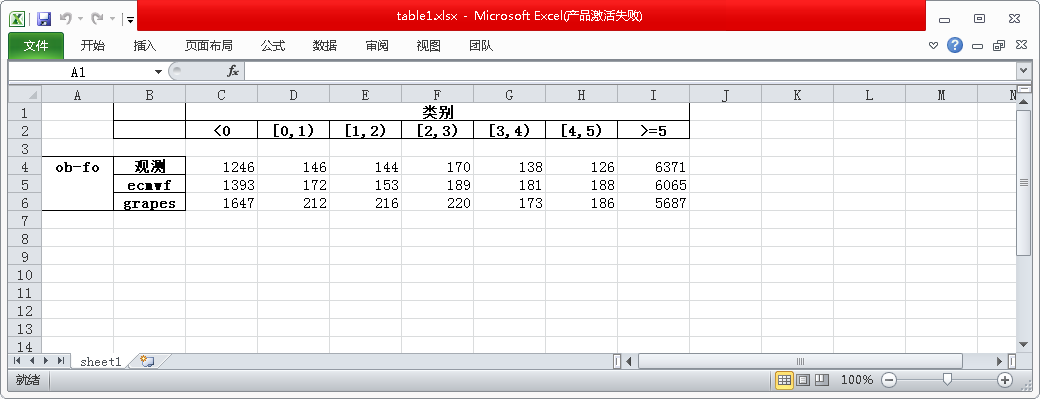

从上面的示例中可以看出，基于本程序库提供的函数，实现了数据收集、数据提取和检验计算代码的解耦，使得我们检验分析的过程变得十分灵活，同时解耦也为各部分的进一步模块化提供了基础。值得注意的是采用上述方法进行检验时，会出现如下几个方面的问题：  
    1，将数据全部收集到sta_all变量当中,需要内存足够大  
    2，当sta_all太大时，从中做数据选取，速度会变慢   
    3，不能计算和存储检验中间检验量，也因此不能开展并行计算  
    4，目前只能支持按一个纬度进行简单的分组，不能按多个维度同时分组，例如将样本同时按月份和时效进行分组的功能无法提供。 
上述问题可以在更上一层（perspact）中提供解决方案  